In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [127]:
school = pd.read_csv("/Users/feliphlvo/Documents/Minerva/Capstone/data/local/school_census.csv",index_col=0)
school = school[(school["n_classes"] > 0) & (school["admin_type"] != 4.0)]
census = pd.read_csv("/Users/feliphlvo/Documents/Minerva/Capstone/data/local/access_df.csv", index_col=0)

In [128]:
# Create percentage statistics
census.rename({"n_people_15to17acc":"n_people_15to17"}, axis=1, inplace=True)
census["pct_black"] = census["n_people_15to17_black"]/census["n_people_15to17"]
census["pct_white"] = census["n_people_15to17_white"]/census["n_people_15to17"]
census["pct_indigenous"] = census["n_people_15to17_indigenous"]/census["n_people_15to17"]
census["pct_pardos"] = census["n_people_15to17_parda"]/census["n_people_15to17"]
census["pct_asian"] = census["n_people_15to17_asian"]/census["n_people_15to17"]
census["pct_men"] = (census["n_people_15_men"] + census["n_people_16_men"] + census["n_people_17_men"])/census["n_people_15to17"]

# Rename zone values to urban and rural
census["zone"] = census["zone"].replace({1.0:"urban", 2.0:"rural"})
# One-hot encoding zone
census = pd.get_dummies(census, columns=["zone"])

# creating region variable (South, Southeast, Northeast, Midwest, North)
census["region"] = census["state"].replace({"AC":"North", "AL":"Northeast", "AM":"North", "AP":"Northeast", "BA":"Northeast", "CE":"Northeast", "DF":"Midwest", "ES":"Southeast", "GO":"Midwest", "MA":"Northeast", "MG":"Southeast", "MS":"Midwest", "MT":"Midwest", "PA":"North", "PB":"Northeast", "PE":"Northeast", "PI":"Northeast", "PR":"South", "RJ":"Southeast", "RN":"Northeast", "RO":"North", "RR":"North", "RS":"South", "SC":"South", "SE":"Northeast", "SP":"Southeast","SP1":"Southeast","SP2":"Southeast", "TO":"North"})
# One-hot encoding region
census = pd.get_dummies(census, columns=["region"])

In [103]:
len(census)

301567

(array([1.000e+00, 2.000e+00, 2.000e+00, 6.000e+00, 8.000e+00, 1.500e+01,
        1.500e+01, 7.600e+01, 8.100e+01, 1.030e+02, 3.780e+02, 2.670e+02,
        5.020e+02, 3.730e+02, 1.474e+03, 6.890e+02, 7.750e+02, 1.779e+03,
        9.120e+02, 1.009e+03, 1.388e+03, 2.306e+03, 9.970e+02, 9.730e+02,
        9.180e+02, 1.869e+03, 6.770e+02, 5.630e+02, 7.830e+02, 2.960e+02,
        2.160e+02, 1.880e+02, 2.610e+02, 9.400e+01, 8.600e+01, 1.270e+02,
        4.400e+01, 4.900e+01, 3.700e+01, 6.800e+01, 2.400e+01, 1.800e+01,
        2.700e+01, 9.000e+00, 5.000e+00, 3.000e+00, 3.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00]),
 array([1.3  , 1.428, 1.556, 1.684, 1.812, 1.94 , 2.068, 2.196, 2.324,
        2.452, 2.58 , 2.708, 2.836, 2.964, 3.092, 3.22 , 3.348, 3.476,
        3.604, 3.732, 3.86 , 3.988, 4.116, 4.244, 4.372, 4.5  , 4.628,
        4.756, 4.884, 5.012, 5.14 , 5.268, 5.396, 5.524, 5.652, 5.78 ,
        5.908, 6.036, 6.164, 6.292, 6.42 , 6.548, 6.676, 6.804, 6.932,
        7.06 , 7.188,

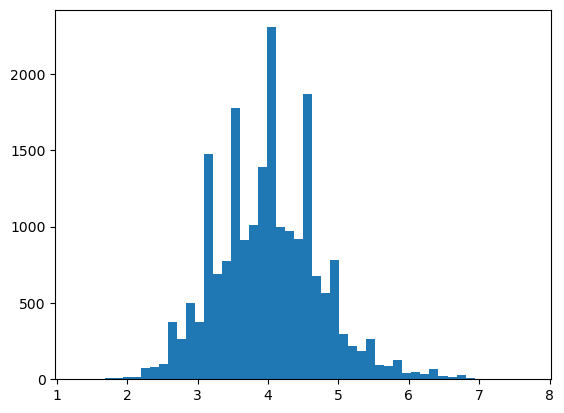

In [104]:
# hist of school quality
plt.hist(school["ideb_filled"], bins=50)

## Summary Statistics

### Census Tracts

In [105]:
# Making a dataframe containing summary statistics

columns = {
    "n_households":"Number of households",
    "n_people":"Number of people", 
    "avg_monthly_earnings":"Average Monthly Earnings",
    "n_people_15to17": "Number of people aged 15 to 17",
    "pct_black": "Percentage black",
    "pct_white": "Percentage white",
    "pct_indigenous": "Percentage indigenous",
    "pct_pardos": "Percentage pardos",
    "pct_asian": "Percentage asian",
    "pct_men": "Percentage male"}

metrics = {
     "mean": "Mean",
    "std": "Std.Dev",
}


df_summary = census[columns.keys()].describe().transpose()[metrics.keys()]

df_summary.rename(index=columns, columns=metrics, inplace=True)
df_summary



,Mean,Std.Dev
Number of households,189.712075,99.753575
Number of people,628.164596,344.438378
Average Monthly Earnings,1230.670235,1353.528070
Number of people aged 15 to 17,34.276330,22.542783
Percentage black,0.067868,0.093036
Percentage white,0.474209,0.274176
Percentage indigenous,0.007208,0.073547
Percentage pardos,0.440494,0.253670
Percentage asian,0.010207,0.030482
Percentage male,0.506578,0.127939


In [106]:
df_summary.to_latex("summary.tex")

/var/folders/v6/m0s_jr6d723809xzpzrvx_340000gn/T/ipykernel_76383/237270451.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_summary.to_latex("summary.tex")


In [107]:
columns = {
    "mod_3sfca_n_classes": "A",
    "Q_n_classes": "Q",
    "Q_adj_3sfca": "H",}

metrics = {
     "mean": "Mean",
    "std": "Std.Dev",
}


df_summary = census[columns.keys()].describe().transpose()[metrics.keys()]

df_summary.rename(index=columns, columns=metrics, inplace=True)
df_summary

,Mean,Std.Dev
A,0.019683,0.017421
Q,4.029765,0.577148
H,0.079538,0.061605


In [108]:
# Count how many rows have geometry equal to school["geometry"][0]
# school["geometry"][0]
census[census["geometry"] == 'GEOMETRYCOLLECTION EMPTY'].count()

3sfca_n_classes                 0
e2sfca_n_classes                0
state                          28
n_households                   28
n_people                       28
avg_monthly_earnings           28
n_people_15to17_white          28
n_people_15to17_black          28
n_people_15to17_asian          28
n_people_15to17_parda          28
n_people_15to17_indigenous     28
n_people_15                    28
n_people_16                    28
n_people_17                    28
n_people_15_men                28
n_people_16_men                28
n_people_17_men                28
n_people_15_women              28
n_people_16_women              28
n_people_17_women              28
n_people_15to17dem             28
n_people_15to17_alternative    28
state_id                        2
state_abbrev                    2
city_id                         2
city_name                       2
district_id                     2
district_name                   2
subdistrict_id                  2
subdistrict_na

In [109]:
# Average number of students per classroom
print("Average number of students per classroom: ", school["n_students"].sum() / school["n_classes"].sum())

Average number of students per classroom:  30.79513771063335


### Schools

In [110]:
school = school[(school["n_classes"] > 0) & (school["admin_type"] != 4.0)]

In [111]:
columns = {
    "n_teachers":"Number of teachers",
    "n_students":"Number of students",
    "n_classes":"Number of classes",}

metrics = {
     "mean": "Mean",
    "std": "Std.Dev",
}


school_summary = school[columns.keys()].describe().transpose()[metrics.keys()]

school_summary.rename(index=columns, columns=metrics, inplace=True)
school_summary

,Mean,Std.Dev
Number of teachers,8.404181,13.446329
Number of students,323.161171,289.465090
Number of classes,10.493902,8.259417


In [112]:
school.columns

Index(['region_name', 'region_id', 'state_name', 'state_abbrev', 'state_id',
       'city_name', 'city_id', 'mesoregion_name', 'mesoregion_id',
       'microregion_name', 'microregion_id', 'sector_id', 'school_id',
       'school_name', 'admin_type', 'location_type', 'address',
       'address_number', 'address_complement', 'neighborhood', 'zip_code',
       'QT_MAT_INF', 'QT_MAT_FUND', 'n_students', 'n_teachers', 'n_classes',
       'sigla_uf', 'geometry', 'ideb_school', 'saeb_school',
       'output_indicator_school', 'ideb_city', 'saeb_city',
       'output_indicator_city', 'ideb_state', 'saeb_state',
       'output_indicator_state', 'ideb_filled'],
      dtype='object')

In [113]:
school.describe()

,region_id,state_id,city_id,mesoregion_id,microregion_id,sector_id,school_id,admin_type,location_type,zip_code,...,ideb_school,saeb_school,output_indicator_school,ideb_city,saeb_city,output_indicator_city,ideb_state,saeb_state,output_indicator_state,ideb_filled
count,20500.000000,20500.000000,2.050000e+04,20500.000000,20500.000000,2.050000e+04,2.050000e+04,20500.000000,20500.000000,2.050000e+04,...,12006.000000,12007.000000,18382.000000,19505.000000,19505.000000,20430.000000,20500.000000,20500.000000,20500.000000,20500.000000
mean,2.881659,32.231366,3.239461e+06,3228.484878,32252.556146,3.239461e+08,3.236884e+07,1.979707,1.142537,5.202654e+07,...,4.175454,4.659987,0.863346,3.973043,4.592582,0.860514,3.953376,4.563758,0.861822,4.010585
std,1.071267,9.872547,9.897297e+05,988.012521,9875.911680,9.897298e+07,9.871519e+06,0.194259,0.349608,2.762400e+07,...,0.803880,0.673165,0.104174,0.612192,0.470498,0.080553,0.419259,0.300263,0.055279,0.746204
min,1.000000,11.000000,1.100015e+06,1101.000000,11001.000000,1.100015e+08,1.100026e+07,1.000000,1.000000,1.107000e+06,...,1.300000,1.951648,0.153759,1.700000,2.236053,0.426798,3.200000,3.930724,0.766159,1.300000
25%,2.000000,26.000000,2.604106e+06,2602.000000,26005.000000,2.604106e+08,2.604306e+07,2.000000,1.000000,2.846000e+07,...,3.600000,4.217778,0.801534,3.500000,4.303865,0.813431,3.600000,4.348177,0.809010,3.500000
50%,3.000000,33.000000,3.301702e+06,3304.000000,33009.000000,3.301702e+08,3.303018e+07,2.000000,1.000000,5.749500e+07,...,4.200000,4.641431,0.883158,4.000000,4.632232,0.868636,4.000000,4.708547,0.862818,4.000000
75%,4.000000,41.000000,4.101804e+06,4101.000000,41002.250000,4.101804e+08,4.100937e+07,2.000000,1.000000,7.580038e+07,...,4.700000,5.051461,0.946439,4.500000,4.900008,0.921999,4.300000,4.763683,0.910656,4.500000
max,5.000000,53.000000,5.300108e+06,5301.000000,53001.000000,5.300108e+08,5.306818e+07,3.000000,2.000000,9.999000e+07,...,7.700000,7.774514,1.000000,6.500000,6.981192,1.000000,4.700000,5.046128,0.947212,7.700000


In [114]:
# count if geomtry is 'GEOMETRYCOLLECTION EMPTY'
school[school["geometry"] == 'GEOMETRYCOLLECTION EMPTY'].count()

region_name                2023
region_id                  2023
state_name                 2023
state_abbrev               2023
state_id                   2023
city_name                  2023
city_id                    2023
mesoregion_name            2023
mesoregion_id              2023
microregion_name           2023
microregion_id             2023
sector_id                  2023
school_id                  2023
school_name                2023
admin_type                 2023
location_type              2023
address                    2023
address_number             1663
address_complement          485
neighborhood               1781
zip_code                   2023
QT_MAT_INF                 2023
QT_MAT_FUND                2023
n_students                 2023
n_teachers                 2022
n_classes                  2023
sigla_uf                   1990
geometry                   2023
ideb_school                 823
saeb_school                 823
output_indicator_school    1445
ideb_cit

# Access and Quality by Subgroups

In [115]:
print_name = {
    "n_teachers":"Number of teachers",
    "n_students":"Number of students",
    "n_classes":"Number of classes",}

import math

def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))

def weighted_average(df, value, weight):
    val = df[value]
    wt = df[weight]
    return (val * wt).sum() / wt.sum()
    
def subgroup_averages(df, subgroups):
    averages = {}
    for subgroup in subgroups:
        averages[subgroup] = [weighted_average(df, "3sfca_n_classes", subgroup), weighted_average(df, "mod_3sfca_n_classes", subgroup), weighted_average(df, "Q_n_classes", subgroup), weighted_average(df, "Q_adj_3sfca", subgroup)]
    
    return pd.DataFrame(averages, index=["Old Access", "Access", "Quality", "Quality-Adjusted Access"]) 


In [116]:
subgroup_averages(census, ["zone_urban", "zone_rural"])
subgroup_averages(census, ["n_people_15to17_black", "n_people_15to17_white", "n_people_15to17_indigenous", "n_people_15to17_parda", "n_people_15to17_asian"])
subgroup_averages(census, ["region_Northeast", "region_North", "region_South", "region_Southeast", "region_Midwest"])

,region_Northeast,region_North,region_South,region_Southeast,region_Midwest
Old Access,0.014665,0.020884,0.020508,0.019711,0.018969
Access,0.014662,0.020880,0.020495,0.019700,0.018965
Quality,3.379786,2.734629,3.934039,3.844502,3.589706
Quality-Adjusted Access,0.055825,0.072604,0.084228,0.077546,0.078989


In [117]:
census["3sfca_n_classes"].mean()

0.019693251382959295

# Regressions

In [118]:
census.isna().sum()

3sfca_n_classes                 19571
e2sfca_n_classes                19571
state                               0
n_households                      120
n_people                          120
avg_monthly_earnings              120
n_people_15to17_white               0
n_people_15to17_black               0
n_people_15to17_asian               0
n_people_15to17_parda               0
n_people_15to17_indigenous          0
n_people_15                         0
n_people_16                         0
n_people_17                         0
n_people_15_men                     0
n_people_16_men                     0
n_people_17_men                     0
n_people_15_women                   0
n_people_16_women                   0
n_people_17_women                   0
n_people_15to17dem                  0
n_people_15to17_alternative         0
state_id                           26
state_abbrev                       26
city_id                            26
city_name                          26
district_id 

In [119]:
census.columns

Index(['3sfca_n_classes', 'e2sfca_n_classes', 'state', 'n_households',
       'n_people', 'avg_monthly_earnings', 'n_people_15to17_white',
       'n_people_15to17_black', 'n_people_15to17_asian',
       'n_people_15to17_parda', 'n_people_15to17_indigenous', 'n_people_15',
       'n_people_16', 'n_people_17', 'n_people_15_men', 'n_people_16_men',
       'n_people_17_men', 'n_people_15_women', 'n_people_16_women',
       'n_people_17_women', 'n_people_15to17dem',
       'n_people_15to17_alternative', 'state_id', 'state_abbrev', 'city_id',
       'city_name', 'district_id', 'district_name', 'subdistrict_id',
       'subdistrict_name', 'neighborhood_name', 'neighborhood_id', 'geometry',
       'microregion_id', 'microregion_name', 'mesoregion_id',
       'mesoregion_name', 'n_people_15to17', 'mod_3sfca_n_classes',
       'Q_n_classes', 'Q_adj_3sfca', 'pct_black', 'pct_white',
       'pct_indigenous', 'pct_pardos', 'pct_asian', 'pct_men', 'zone_rural',
       'zone_urban', 'region_Midwest',

In [136]:
school[school["region_name"] == "Norte"]["ideb_filled"].mean()

3.433078027764481

## Prepare Data

In [125]:
census.isna().sum()

3sfca_n_classes                 19571
e2sfca_n_classes                19571
state                               0
n_households                      120
n_people                          120
avg_monthly_earnings              120
n_people_15to17_white               0
n_people_15to17_black               0
n_people_15to17_asian               0
n_people_15to17_parda               0
n_people_15to17_indigenous          0
n_people_15                         0
n_people_16                         0
n_people_17                         0
n_people_15_men                     0
n_people_16_men                     0
n_people_17_men                     0
n_people_15_women                   0
n_people_16_women                   0
n_people_17_women                   0
n_people_15to17dem                  0
n_people_15to17_alternative         0
state_id                           26
state_abbrev                       26
city_id                            26
city_name                          26
district_id 

In [134]:
# Regression on accessibility metric
import statsmodels.api as sm
import statsmodels.formula.api as smf

# drop rows with missing access values
census_nona = census.dropna(subset=["Q_n_classes", "avg_monthly_earnings"])
print(census_nona.isna().sum())
y = census_nona["Q_adj_3sfca"]
X = census_nona[["pct_black", "pct_indigenous", "pct_pardos", "pct_asian", "pct_men", "avg_monthly_earnings", "zone_rural", "region_Midwest", "region_Northeast", "region_South", "region_North"]]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

3sfca_n_classes                     0
e2sfca_n_classes                    0
state                               0
n_households                        0
n_people                            0
avg_monthly_earnings                0
n_people_15to17_white               0
n_people_15to17_black               0
n_people_15to17_asian               0
n_people_15to17_parda               0
n_people_15to17_indigenous          0
n_people_15                         0
n_people_16                         0
n_people_17                         0
n_people_15_men                     0
n_people_16_men                     0
n_people_17_men                     0
n_people_15_women                   0
n_people_16_women                   0
n_people_17_women                   0
n_people_15to17dem                  0
n_people_15to17_alternative         0
state_id                            0
state_abbrev                        0
city_id                             0
city_name                           0
district_id 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q_adj_3sfca   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2149.
Date:                Sat, 04 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:39:22   Log-Likelihood:             3.9702e+05
No. Observations:              281880   AIC:                        -7.940e+05
Df Residuals:                  281868   BIC:                        -7.939e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0998      0.001    166.761      0.000       0.099       0.101
pct_black               -0.0565      0.001    -44.430      0.000      -0.059      -0.054
pct_indigenous           0.1266      0.002     56.983      0.000       0.122       0.131
pct_pardos              -0.0131      0.001    -20.449      0.000      -0.014      -0.012
pct_asian               -0.0018      0.004     -0.477      0.633      -0.009       0.006
pct_men                 -0.0028      0.001     -3.088      0.002      -0.005      -0.001
avg_monthly_earnings -2.506e-06   9.33e-08    -26.859      0.000   -2.69e-06   -2.32e-06
zone_rural              -0.0304      0.000   -101.015      0.000      -0.031      -0.030
region_Midwest           0.0096      0.000     20.990      0.000       0.009       0.011
region_Northeast        -0.0116      0.000    -36.885      0.000      -0.012      -0.011
region_South             0.0037      0.000     10.480      0.000       0.003       0.004
region_North             0.0122      0.001     22.765      0.000       0.011       0.013
==============================================================================
Omnibus:                  1009250.899   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1854741718785.768
Skew:                          72.127   Prob(JB):                         0.00
Kurtosis:                   12568.697   Cond. No.                     6.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Correlations

In [20]:
# norm_access_df = geo_dem_census_df.set_index("sector_id").join(A.access_df[["e2sfca_n_classes","3sfca_n_classes", "e2sfca_n_teachers", "3sfca_n_teachers"]], how="left")
# sp_df = norm_access_df[norm_access_df["city_name"] == "Araçatuba"]
# plt.scatter(sp_df["3sfca_n_teachers"], sp_df["3sfca_n_classes"], alpha=0.3)
# # set limits on the axes

# plt.xlabel("Teachers")
# plt.ylabel("Classrooms")
# plt.show()

NameError: name 'geo_dem_census_df' is not defined